# Kaggle Competition Final Project

# *1C Company* - Predict Future Sales

**Motivation**

*This challenge serves as final project for the "How to win a data science competition" Coursera course. In this competition you will work with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. We are asking you to **predict total sales for every product and store in the next month**. By solving this competition you will be able to apply and enhance your data science skills.*

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

Submissions are evaluated by **root mean squared error** (RMSE). True target values are clipped into [0,20] range. For each id in the test set, you must predict a total number of sales.

Source: https://www.kaggle.com/c/competitive-data-science-final-project

**Summary**

    1. Exploratory data analysis
        1.1. Getting a look at the data
        1.2. Target variable
        1.3. Train/test id distribution
        1.4. Multivariate heatmaps (numerical/categorical pairings)
    2. Approaches to work with features
        2.1. Preprocessing 
        2.2. Extracting
            2.2.1. Extracting Bag of words features from shops names
            2.2.2. Extracting Bag of words with TF-IDF postprocessing features from items
            2.2.3. Matrix factorization of BOW processed features
            2.2.4. Extracting categorical features from Russian shop names and categories
        2.3. Generation
            2.3.1. From another tables
            2.3.2. Mountly aggregated
            2.3.3. Lagged based features
    3. Validation scheme
        3.1. Mean encoding on categorical features
    4. Model training
        4.1. Linear 
        4.2. Decision tree 
        4.3. Random Forest 
        4.4. LightGBM
        4.5. XGBoost 
        4.6. Ensembling: XGBoost + Linear Regression
        4.7. Leaderboard test prediction

**Guidelines**

1. *Clarity*: The clear step-by-step instruction on how to produce the final submit file is provided. Code has comments where it is needed and meaningful function names
2. *Feature preprocessing and generation with respect to models*: Several simple features are generated. For non-tree-based models preprocessing is used or the absence of it is explained
3. *Feature extraction from text and images*: Features from text are extracted. Special preprocessings for text are utilized (TF-IDF, stemming, levenshtening...)
4. *EDA*: Several interesting observations about data are discovered and explained. Target distribution is visualized, time trend is assessed
5. *Validation*: Type of train/test split is identified and used for validation. Type of public/private split is identified
6. *Data leakages*: Data is investigated for data leakages and investigation process is described. Found data leakages are utilized
7. *Metrics optimization*: Correct metric is optimized
8. *Advanced Features I (mean encodings)*: Mean-encoding is applied. Mean-encoding is set up correctly, i.e. KFold or expanding scheme are utilized correctly
9. *Advanced Features II*: At least one feature from this topic is introduced
10. *Hyperparameter tuning*: Parameters of models are roughly optimal
11. *Ensembles*: Ensembling is utilized (linear combination counts). Validation with ensembling scheme is set up correctly, i.e. KFold or Holdout is utilized. Models from different classes are utilized (at least two from the following: KNN, linear models, RF, GBDT, NN)

**Packages (notice: not all of them are used)**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

import copy
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Lars, ElasticNet
#from bayes_opt import BayesianOptimization (not used)
#import shap (not used)
from sklearn.externals import joblib
import xgboost as xgb
RANDOM_STATE=42

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
kaggle_path = "/content/drive/My Drive/Kaggle"
competition_path = os.path.join(kaggle_path,'competitive-data-science-final-project')
os.chdir(competition_path)

In [ ]:
# import os
# kaggle_path = "/content/drive/My Drive/Kaggle"
# os.environ['KAGGLE_CONFIG_DIR'] = kaggle_path
# competition_path = os.path.join(kaggle_path,'competitive-data-science-final-project')
# if not os.path.exists(competition_path):
#   os.mkdir(competition_path)
# os.chdir(competition_path)
# !kaggle competitions download -c competitive-data-science-final-project
# !unzip '*.zip'

In [ ]:
# !unzip \*.zip  && rm *.zip
# !gunzip '/content/drive/My Drive/Kaggle/competitive-data-science-final-project/test.csv.gz'

In [ ]:
!pwd
!ls

/content/drive/My Drive/Kaggle/competitive-data-science-final-project
item_categories.csv  items.csv	sales_train.csv        shops.csv    test.csv
item_cats.csv	     models	sample_submission.csv  submissions


# Part 1/4: Exploratory data analysis

## 1.1. Getting a look at the data
Let's take a quick look at what type of data we are dealing with, by using pandas' functions `shape`, `unique()` and `head()`.

In [ ]:
# DATA_FOLDER='/kaggle/input/competitive-data-science-predict-future-sales/'
DATA_FOLDER = competition_path

shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
sales_train    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))
test    = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))

Number of items

In [ ]:
print(sales_train.shape)
print(sales_train.nunique())
sales_train.head()

(2935849, 6)
date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Look at shops and categories

In [ ]:
print(shops.shape)
print(shops.nunique())
shops.head()

(60, 2)
shop_name    60
shop_id      60
dtype: int64


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
print(item_categories.shape)
print(item_categories.nunique())
item_categories.head()

(84, 2)
item_category_name    84
item_category_id      84
dtype: int64


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


## 1.2. Target variable
From target evalution we can see season tendency year by year. Target distribution shows the most of the values are between 0 and 5.

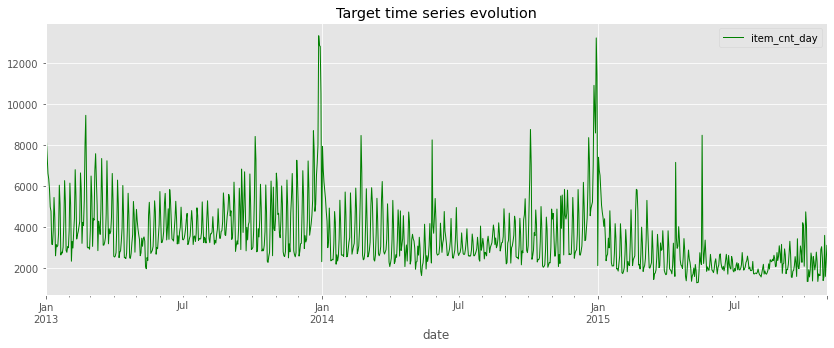

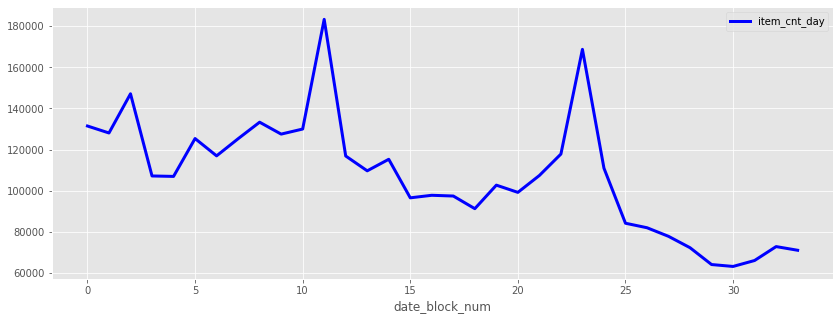

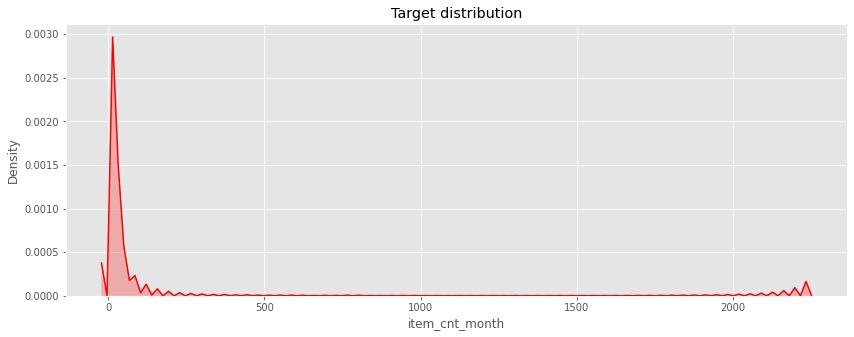

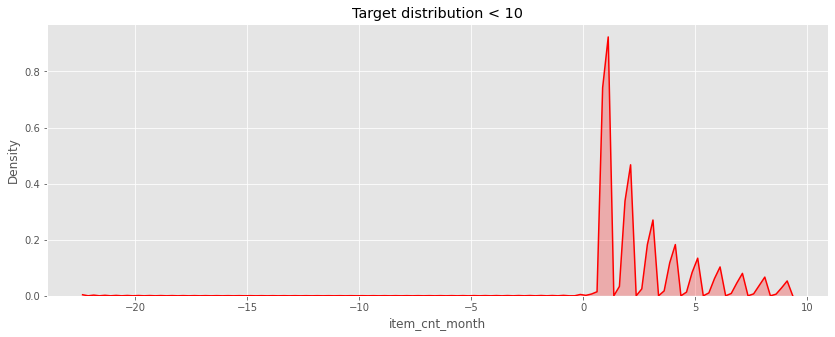

In [ ]:
import gc
sales_train['date'] = pd.to_datetime(sales_train['date'], format="%d.%m.%Y")
sales_train.groupby('date').agg({'item_cnt_day': 'sum'}).plot(figsize=(14,5), title='Target time series evolution', lw=1.0, color='green')
sales_train.groupby('date_block_num').agg({'item_cnt_day': 'sum'}).plot(figsize=(14,5), lw=3.0, color='blue')
plt.show()

cols = ['date_block_num','shop_id','item_id']
temp = sales_train.groupby(cols).agg({'item_cnt_day': ['sum']})
temp.columns = ['item_cnt_month']
temp.reset_index(inplace=True)
train_temp = pd.merge(sales_train, temp, on=cols, how='left')

fig, ax = plt.subplots(figsize=(14,5))
ax = sns.kdeplot(train_temp['item_cnt_month'].values, shade=True, color="red", ax=ax)
ax.set_xlabel('item_cnt_month')
ax.set_ylabel('Density')
ax.set_title('Target distribution')
plt.show()

fig, ax = plt.subplots(figsize=(14,5))
ax = sns.kdeplot(train_temp.loc[train_temp['item_cnt_month']<10, 'item_cnt_month'].values, shade=True, color="red", ax=ax)
ax.set_xlabel('item_cnt_month')
ax.set_ylabel('Density')
ax.set_title('Target distribution < 10')
plt.show()

## 1.3. Train/test id distribution
Check distribution of `item_id` and `shop_id` are similar in train and test sets

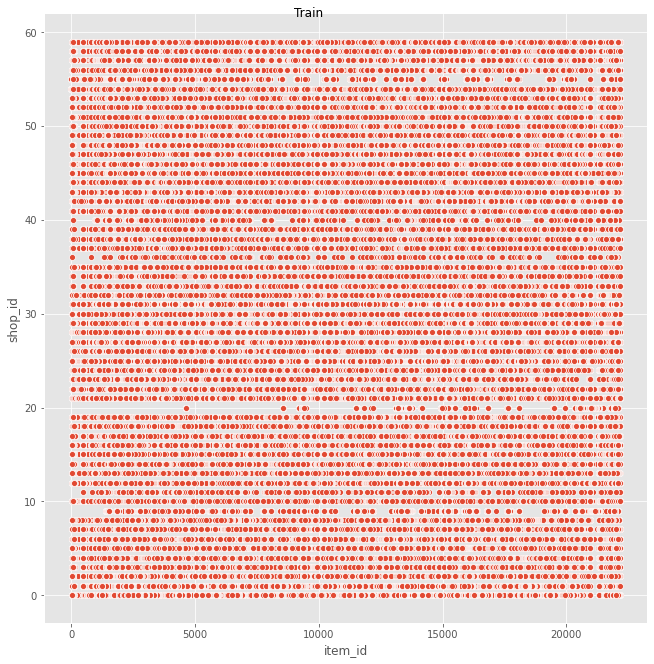

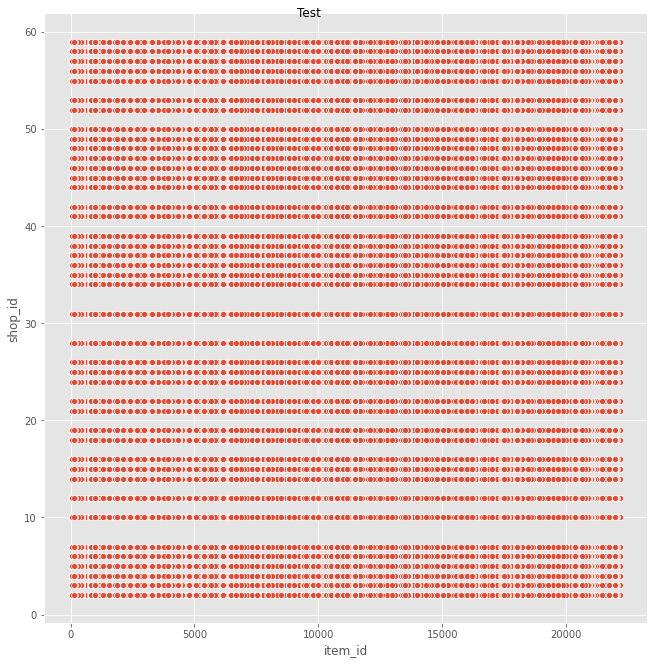

In [ ]:
g = sns.relplot(x="item_id", y="shop_id", data=train_temp)
g.fig.suptitle("Train")
g.fig.set_size_inches(10,10)

test_temp=pd.DataFrame({'date_block_num':34,'shop_id':test.shop_id,'item_id':test.item_id})

g = sns.relplot(x="item_id", y="shop_id", data=test_temp)
g.fig.suptitle("Test")
g.fig.set_size_inches(10,10)

plt.show()

## 1.4. Multivariate heatmaps (numerical/categorical pairings)
Pair different categorical variables (ex. `item_id`, `item_category_id`, `shop_id`) together and check the performance of different pairs (total sales' performance with item_cnt_month).

In [ ]:
train_temp.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_cnt_month
0,2013-01-02,0,59,22154,999.00,1.0,1.0
1,2013-01-03,0,25,2552,899.00,1.0,0.0
2,2013-01-05,0,25,2552,899.00,-1.0,0.0
3,2013-01-06,0,25,2554,1709.05,1.0,1.0
4,2013-01-15,0,25,2555,1099.00,1.0,1.0


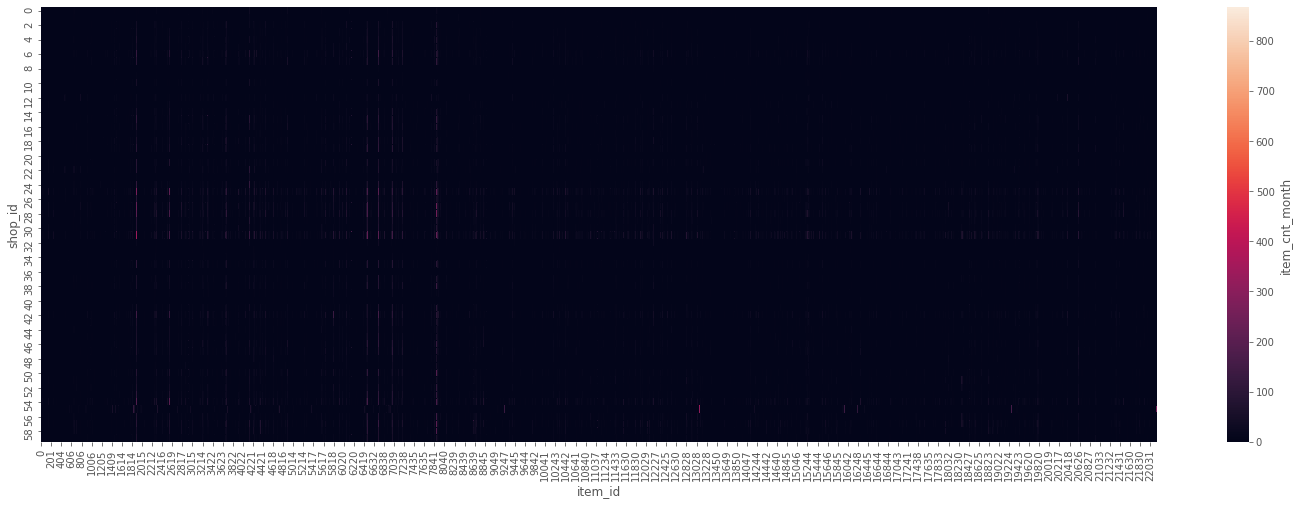

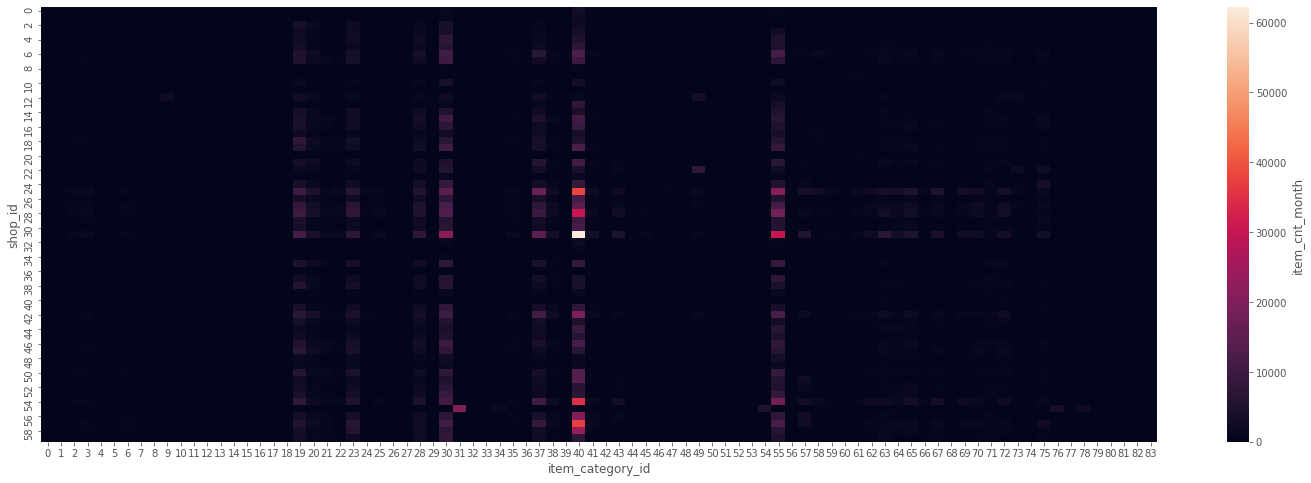

In [ ]:
train_temp = pd.merge(train_temp, items, on=['item_id'], how='left')

shops_hm = train_temp.pivot_table(index='shop_id', columns='item_id', values='item_cnt_month', aggfunc='count', fill_value=0)
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(shops_hm, ax=ax, cbar=True, cbar_kws={'label': 'item_cnt_month'})

shops_hm2 = train_temp.pivot_table(index='shop_id', columns='item_category_id', values='item_cnt_month', aggfunc='count', fill_value=0)
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(shops_hm2, ax=ax, cbar=True, cbar_kws={'label': 'item_cnt_month'})
plt.show()

del train_temp,test_temp,shops_hm,shops_hm2; gc.collect();

# Part 2/4: Approaches to work with features

## 2.1. Preprocessing 

In [ ]:
from itertools import product
train_temp = []
cols = ['date_block_num','shop_id','item_id']
for block_num in range(34):
    temp = sales_train[sales_train.date_block_num==block_num]
    train_temp.append(np.array(list(product([block_num], temp['shop_id'].unique(), temp['item_id'].unique()))))
    
train_temp = pd.DataFrame(np.vstack(train_temp), columns=cols)
train_temp['date_block_num'] = train_temp['date_block_num'].astype(np.int8)
train_temp['shop_id'] = train_temp['shop_id'].astype(np.int8)
train_temp['item_id'] = train_temp['item_id'].astype(np.int16)
train_temp.sort_values(cols,inplace=True);
train_temp.head()

,date_block_num,shop_id,item_id
139255,0,0,19
141495,0,0,27
144968,0,0,28
142661,0,0,29
138947,0,0,32


Aggregate **train data** by month to make it compatible with test data

In [ ]:
temp = sales_train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': ['sum']})
temp.columns = ['item_cnt_month']
temp.reset_index(inplace=True)

train_temp = pd.merge(train_temp, temp, on=cols, how='left')
train_temp.head()
train_temp['item_cnt_month'] = train_temp['item_cnt_month'].fillna(0).clip(0,20).astype(np.float16)
print(train_temp.shape)
train_temp.head()

(10913850, 4)


,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0
3,0,0,29,0.0
4,0,0,32,6.0


Add data_block_num relevant to next mount to **test data**

In [ ]:
test_temp=pd.DataFrame({'date_block_num':34,'shop_id':test.shop_id,'item_id':test.item_id})
test_temp['date_block_num'] = test_temp['date_block_num'].astype(np.int8)
test_temp['shop_id'] = test_temp['shop_id'].astype(np.int8)
test_temp['item_id'] = test_temp['item_id'].astype(np.int16)
print(test_temp.shape)
print(test_temp.head())
print(test_temp.dtypes)

(214200, 3)
   date_block_num  shop_id  item_id
0              34        5     5037
1              34        5     5320
2              34        5     5233
3              34        5     5232
4              34        5     5268
date_block_num     int8
shop_id            int8
item_id           int16
dtype: object


Concatenate **train and test data**

In [ ]:
data_temp=pd.concat([train_temp, test_temp], ignore_index=True, sort=False, keys=cols)
data_temp.fillna(0, inplace=True)
print(data_temp.shape)
print(data_temp.nunique())
print(data_temp.head())

(11128050, 4)
date_block_num       35
shop_id              60
item_id           22170
item_cnt_month       21
dtype: int64
   date_block_num  shop_id  item_id  item_cnt_month
0               0        0       19             0.0
1               0        0       27             0.0
2               0        0       28             0.0
3               0        0       29             0.0
4               0        0       32             6.0


## 2.2. Extraction
We have only 60 shops so if we use Bag of word approach then we would have not so huge vectors. But for 22170 items it is better to use small vectors produced by word2vec NN.

### 2.2.1. Extracting Bag of words features from Russian shops names

In [ ]:
# # shops_processed = shops.copy()
# item_categories_procwessed = item_categories.copy()

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

shops_bow_cols=[]
shops_processed = pd.DataFrame(shops.shop_id)
vectorizer = CountVectorizer()
txt_features = pd.DataFrame(vectorizer.fit_transform(shops.shop_name).toarray())
for txt_feature in txt_features.columns:
    new_col_name = 'shop_name_bow_' + str(txt_feature)
    shops_processed[new_col_name] = txt_features[txt_feature]
    shops_bow_cols.append(new_col_name)
print(shops_processed.shape)

(60, 114)


In [ ]:
# Get terms from documents
print(vectorizer.get_feature_names())
# Test random sentense
analyze = vectorizer.build_analyzer()
extracted_terms= analyze('!Якутск ТЦ "Центральный" фран')
print(f'\nTest sentense:!Якутск ТЦ "Центральный" фран --> {extracted_terms}')

['13', '1с', '39м', '39м²', '56', '7я', 'ii', 'xl', 'xxi', 'а2', 'адыгея', 'альтаир', 'ареал', 'атриум', 'афи', 'балашиха', 'белая', 'беляево', 'берег', 'бехетле', 'буденовский', 'век', 'взлетка', 'волга', 'волжский', 'вологда', 'воронеж', 'выездная', 'галерея', 'горизонт', 'город', 'град', 'гудвин', 'дача', 'дом', 'жуковский', 'зеленый', 'изумрудный', 'интернет', 'июнь', 'к7', 'казань', 'калуга', 'карнавал', 'киномир', 'коломна', 'красноярск', 'кристалл', 'курск', 'магазин', 'максимир', 'мармелад', 'мега', 'мегацентр', 'мелодия', 'молл', 'москва', 'мтрц', 'мытищи', 'невский', 'новгород', 'новокосино', 'новосибирск', 'новый', 'октябрь', 'омск', 'онлайн', 'орджоникидзе', 'островной', 'пав', 'парк', 'паркхаус', 'перловский', 'плаза', 'плехановская', 'посад', 'пушкинский', 'распродажа', 'рио', 'ростовнадону', 'с21', 'самара', 'семеновский', 'семья', 'сенная', 'сергиев', 'серебряный', 'сити', 'склад', 'спб', 'стан', 'сургут', 'теплый', 'тк', 'томск', 'торговля', 'трк', 'трц', 'тц', 'тюмень

### 2.2.2. Extracting Bag of words with TF-IDF postprocessing features from items

In [ ]:
items_processed = items.copy()
nb_features=1000
items_tfidf_cols=[]
tfidf = TfidfVectorizer(max_features=nb_features)
items_processed['item_name_len'] = items_processed['item_name'].map(len)  # Name lenth
txt_features = pd.DataFrame(tfidf.fit_transform(items_processed['item_name']).toarray())
cols = txt_features.columns
for i in range(nb_features):
    new_col_name = 'item_name_tfidf_' + str(i)
    items_processed[new_col_name] = txt_features[cols[i]]
    items_tfidf_cols.append(new_col_name)
items_processed.drop(['item_name'], axis=1, inplace=True)
items_processed.head()

,item_id,item_category_id,item_name_len,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,item_name_tfidf_5,item_name_tfidf_6,item_name_tfidf_7,item_name_tfidf_8,item_name_tfidf_9,item_name_tfidf_10,item_name_tfidf_11,item_name_tfidf_12,item_name_tfidf_13,item_name_tfidf_14,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24,item_name_tfidf_25,item_name_tfidf_26,item_name_tfidf_27,item_name_tfidf_28,item_name_tfidf_29,item_name_tfidf_30,item_name_tfidf_31,item_name_tfidf_32,item_name_tfidf_33,item_name_tfidf_34,item_name_tfidf_35,item_name_tfidf_36,...,item_name_tfidf_960,item_name_tfidf_961,item_name_tfidf_962,item_name_tfidf_963,item_name_tfidf_964,item_name_tfidf_965,item_name_tfidf_966,item_name_tfidf_967,item_name_tfidf_968,item_name_tfidf_969,item_name_tfidf_970,item_name_tfidf_971,item_name_tfidf_972,item_name_tfidf_973,item_name_tfidf_974,item_name_tfidf_975,item_name_tfidf_976,item_name_tfidf_977,item_name_tfidf_978,item_name_tfidf_979,item_name_tfidf_980,item_name_tfidf_981,item_name_tfidf_982,item_name_tfidf_983,item_name_tfidf_984,item_name_tfidf_985,item_name_tfidf_986,item_name_tfidf_987,item_name_tfidf_988,item_name_tfidf_989,item_name_tfidf_990,item_name_tfidf_991,item_name_tfidf_992,item_name_tfidf_993,item_name_tfidf_994,item_name_tfidf_995,item_name_tfidf_996,item_name_tfidf_997,item_name_tfidf_998,item_name_tfidf_999
0,0,40,41,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,76,68,0.0,0.0,0.0,0.0,0.0,0.0,0.379471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,40,45,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,40,47,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,40,43,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.2.3 Matrix factorization of BOW processed features

NMF decomposition of shops BOW

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD, NMF
prev_shape = shops_processed.shape
nmf = NMF(n_components=5, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200)
nmf.fit(shops_processed[shops_bow_cols])
shops_bow_transformed = pd.DataFrame(nmf.transform(shops_processed[shops_bow_cols]))
shops_processed = pd.DataFrame(shops.shop_id)
for col_num in shops_bow_transformed.columns:
    new_col_name = 'shop_name_bow_nmf_' + str(col_num)
    shops_processed[new_col_name] = shops_bow_transformed[col_num]
print(f'{prev_shape} --> {shops_processed.shape}')

(60, 114) --> (60, 6)


NMF decomposition of items BOW postprocessed with TF-IDF

In [ ]:
prev_shape = items_processed.shape
nmf = NMF(n_components=7, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200)
nmf.fit(items_processed[items_tfidf_cols])
items_tfidf_transformed = pd.DataFrame(nmf.transform(items_processed[items_tfidf_cols]))
for col_num in items_tfidf_transformed.columns:
    new_col_name = 'item_name_tfidf_nmf_' + str(col_num)
    items_processed[new_col_name] = items_tfidf_transformed[col_num]
items_processed.drop(items_tfidf_cols, axis=1, inplace=True)
print(f'{prev_shape} --> {items_processed.shape}')

(22170, 1003) --> (22170, 10)


### 2.2.4. Extracting categorical features from Russian shop names and categories

In [ ]:
from sklearn.preprocessing import LabelEncoder
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'
shops_processed['city_code'] = LabelEncoder().fit_transform(shops['city'])

item_categories['split'] = item_categories['item_category_name'].str.split('-')
item_categories['type'] = item_categories['split'].map(lambda x: x[0].strip())
item_categories['type_code'] = LabelEncoder().fit_transform(item_categories['type'])
item_categories['subtype'] = item_categories['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
item_categories['subtype_code'] = LabelEncoder().fit_transform(item_categories['subtype'])
item_categories = item_categories[['item_category_id','type_code', 'subtype_code']]
item_categories.head()

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


## 2.3. Generation

### 2.3.1. From another tables

In [ ]:
data_temp = pd.merge(data_temp, shops_processed, on=['shop_id'], how='left')
data_temp = pd.merge(data_temp, items_processed, on=['item_id'], how='left')
data_temp = pd.merge(data_temp, item_categories, on=['item_category_id'], how='left')
print(data_temp.shape)
data_temp.head()

(11128050, 21)


,date_block_num,shop_id,item_id,item_cnt_month,shop_name_bow_nmf_0,shop_name_bow_nmf_1,shop_name_bow_nmf_2,shop_name_bow_nmf_3,shop_name_bow_nmf_4,city_code,item_category_id,item_name_len,item_name_tfidf_nmf_0,item_name_tfidf_nmf_1,item_name_tfidf_nmf_2,item_name_tfidf_nmf_3,item_name_tfidf_nmf_4,item_name_tfidf_nmf_5,item_name_tfidf_nmf_6,type_code,subtype_code
0,0,0,19,0.0,0.0,0.0,0.0,0.0,1.064954,29,40,25,0.000534,0.000105,0.005655,0.004743,0.000000,0.001241,0.0,11,4
1,0,0,27,0.0,0.0,0.0,0.0,0.0,1.064954,29,19,33,0.000000,0.000000,0.007237,0.000000,0.110050,0.000000,0.0,5,10
2,0,0,28,0.0,0.0,0.0,0.0,0.0,1.064954,29,30,39,0.000000,0.000000,0.012615,0.033001,0.070018,0.000000,0.0,8,55
3,0,0,29,0.0,0.0,0.0,0.0,0.0,1.064954,29,23,38,0.000000,0.000000,0.000000,0.000000,0.133211,0.000000,0.0,5,16
4,0,0,32,6.0,0.0,0.0,0.0,0.0,1.064954,29,40,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,11,4


### 2.3.2. Mountly aggregated

In [ ]:
########## 1. Create 'date_avg_item_cnt'
temp = data_temp.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_avg_item_cnt']          ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num'], how='left')

########## 2. Create 'date_item_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_item_avg_item_cnt']     ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num','item_id'], how='left')

########## 3. Create 'date_shop_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_avg_item_cnt']     ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num','shop_id'], how='left')

########## 4. Create 'date_cat_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_cat_avg_item_cnt']      ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num','item_category_id'], how='left')

########## 5. Create 'date_shop_cat_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'shop_id', 'item_category_id']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_cat_avg_item_cnt']    ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')

########## 6. Create 'date_shop_type_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'shop_id', 'type_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_type_avg_item_cnt']    ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num', 'shop_id', 'type_code'], how='left')

########## 7. Create 'date_type_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'type_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_type_avg_item_cnt']     ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num', 'type_code'], how='left')

########## 8. Create 'date_city_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'city_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_city_avg_item_cnt']     ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num', 'city_code'], how='left')

########## 9. Create 'date_shop_subtype_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_subtype_avg_item_cnt']   ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')

########## 10. Create 'date_item_city_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'item_id', 'city_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_item_city_avg_item_cnt']     ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num', 'item_id', 'city_code'], how='left')

########## 11. Create 'date_subtype_avg_item_cnt'
temp = data_temp.groupby(['date_block_num', 'subtype_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_subtype_avg_item_cnt']     ###
temp.reset_index(inplace=True)
data_temp = pd.merge(data_temp, temp, on=['date_block_num', 'subtype_code'], how='left')
print(data_temp.shape)
data_temp.head()

(11128050, 32)


,date_block_num,shop_id,item_id,item_cnt_month,shop_name_bow_nmf_0,shop_name_bow_nmf_1,shop_name_bow_nmf_2,shop_name_bow_nmf_3,shop_name_bow_nmf_4,city_code,item_category_id,item_name_len,item_name_tfidf_nmf_0,item_name_tfidf_nmf_1,item_name_tfidf_nmf_2,item_name_tfidf_nmf_3,item_name_tfidf_nmf_4,item_name_tfidf_nmf_5,item_name_tfidf_nmf_6,type_code,subtype_code,date_avg_item_cnt,date_item_avg_item_cnt,date_shop_avg_item_cnt,date_cat_avg_item_cnt,date_shop_cat_avg_item_cnt,date_shop_type_avg_item_cnt,date_type_avg_item_cnt,date_city_avg_item_cnt,date_shop_subtype_avg_item_cnt,date_item_city_avg_item_cnt,date_subtype_avg_item_cnt
0,0,0,19,0.0,0.0,0.0,0.0,0.0,1.064954,29,40,25,0.000534,0.000105,0.005655,0.004743,0.000000,0.001241,0.0,11,4,0.347168,0.022217,0.666992,0.293945,0.739746,0.657715,0.271729,0.51416,0.739746,0.0,0.293945
1,0,0,27,0.0,0.0,0.0,0.0,0.0,1.064954,29,19,33,0.000000,0.000000,0.007237,0.000000,0.110050,0.000000,0.0,5,10,0.347168,0.155518,0.666992,0.834961,1.467773,1.586914,0.727539,0.51416,1.459961,0.5,0.814941
2,0,0,28,0.0,0.0,0.0,0.0,0.0,1.064954,29,30,39,0.000000,0.000000,0.012615,0.033001,0.070018,0.000000,0.0,8,55,0.347168,0.177734,0.666992,1.126953,1.788086,1.738281,1.140625,0.51416,1.788086,0.0,1.126953
3,0,0,29,0.0,0.0,0.0,0.0,0.0,1.064954,29,23,38,0.000000,0.000000,0.000000,0.000000,0.133211,0.000000,0.0,5,16,0.347168,0.088867,0.666992,0.547363,1.500000,1.586914,0.727539,0.51416,1.590820,0.5,0.577637
4,0,0,32,6.0,0.0,0.0,0.0,0.0,1.064954,29,40,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,11,4,0.347168,5.378906,0.666992,0.293945,0.739746,0.657715,0.271729,0.51416,0.739746,6.5,0.293945


### 2.3.3. Lagged based features

In [ ]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id', col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

lags = [1,2,3,4,5,6]
data_temp = lag_feature(data_temp, lags, 'item_cnt_month')
data_temp = lag_feature(data_temp, lags, 'date_avg_item_cnt')
data_temp.drop(['date_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, lags, 'date_item_avg_item_cnt')
data_temp.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, lags, 'date_shop_avg_item_cnt')
data_temp.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, lags, 'date_cat_avg_item_cnt')
data_temp.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, lags, 'date_shop_cat_avg_item_cnt')
data_temp.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, [1], 'date_shop_type_avg_item_cnt')
data_temp.drop(['date_shop_type_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, [1], 'date_type_avg_item_cnt')
data_temp.drop(['date_type_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, [1], 'date_city_avg_item_cnt')
data_temp.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, [1], 'date_shop_subtype_avg_item_cnt')
data_temp.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, [1], 'date_item_city_avg_item_cnt')
data_temp.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)
data_temp = lag_feature(data_temp, [1], 'date_subtype_avg_item_cnt')
data_temp.drop(['date_subtype_avg_item_cnt'], axis=1, inplace=True)
data_temp=data_temp.fillna(0)
print(data_temp.shape)
data_temp.tail()

(11128050, 63)


,date_block_num,shop_id,item_id,item_cnt_month,shop_name_bow_nmf_0,shop_name_bow_nmf_1,shop_name_bow_nmf_2,shop_name_bow_nmf_3,shop_name_bow_nmf_4,city_code,item_category_id,item_name_len,item_name_tfidf_nmf_0,item_name_tfidf_nmf_1,item_name_tfidf_nmf_2,item_name_tfidf_nmf_3,item_name_tfidf_nmf_4,item_name_tfidf_nmf_5,item_name_tfidf_nmf_6,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,item_cnt_month_lag_5,item_cnt_month_lag_6,date_avg_item_cnt_lag_1,date_avg_item_cnt_lag_2,date_avg_item_cnt_lag_3,date_avg_item_cnt_lag_4,date_avg_item_cnt_lag_5,date_avg_item_cnt_lag_6,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_4,date_item_avg_item_cnt_lag_5,date_item_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_4,date_shop_avg_item_cnt_lag_5,date_shop_avg_item_cnt_lag_6,date_cat_avg_item_cnt_lag_1,date_cat_avg_item_cnt_lag_2,date_cat_avg_item_cnt_lag_3,date_cat_avg_item_cnt_lag_4,date_cat_avg_item_cnt_lag_5,date_cat_avg_item_cnt_lag_6,date_shop_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_2,date_shop_cat_avg_item_cnt_lag_3,date_shop_cat_avg_item_cnt_lag_4,date_shop_cat_avg_item_cnt_lag_5,date_shop_cat_avg_item_cnt_lag_6,date_shop_type_avg_item_cnt_lag_1,date_type_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1
11128045,34,45,18454,0.0,0.422301,0.0,0.0,0.0,0.0,20,55,11,0.000000,0.002052,0.000000,0.014298,0.000000,0.000000,0.000000,13,2,1.0,0.0,0.0,0.0,0.0,0.0,0.258545,0.263672,0.288086,0.259277,0.26416,0.259521,0.045441,0.023254,0.071411,0.279053,0.441895,0.590820,0.126709,0.128784,0.139038,0.126831,0.119446,0.137573,0.196899,0.177612,0.217285,0.216675,0.207275,0.206909,0.126831,0.074524,0.106079,0.129517,0.090393,0.127563,0.089294,0.146973,0.135376,0.126831,0.5,0.196899
11128046,34,45,16188,0.0,0.422301,0.0,0.0,0.0,0.0,20,64,28,0.000157,0.000193,0.000000,0.000000,0.006614,0.000843,0.000729,14,42,0.0,0.0,0.0,0.0,0.0,0.0,0.258545,0.263672,0.000000,0.000000,0.00000,0.000000,0.022720,0.069763,0.000000,0.000000,0.000000,0.000000,0.126709,0.128784,0.000000,0.000000,0.000000,0.000000,0.155884,0.167847,0.000000,0.000000,0.000000,0.000000,0.094482,0.117126,0.000000,0.000000,0.000000,0.000000,0.106201,0.237305,0.135376,0.094482,0.0,0.155884
11128047,34,45,15757,0.0,0.422301,0.0,0.0,0.0,0.0,20,55,34,0.000444,0.000242,0.005176,0.005725,0.000000,0.002074,0.000325,13,2,0.0,0.0,0.0,0.0,0.0,0.0,0.258545,0.263672,0.288086,0.259277,0.26416,0.259521,0.113647,0.069763,0.095215,0.093018,0.186035,0.250000,0.126709,0.128784,0.139038,0.126831,0.119446,0.137573,0.196899,0.177612,0.217285,0.216675,0.207275,0.206909,0.126831,0.074524,0.106079,0.129517,0.090393,0.127563,0.089294,0.146973,0.135376,0.126831,0.0,0.196899
11128048,34,45,19648,0.0,0.422301,0.0,0.0,0.0,0.0,20,40,31,0.000000,0.105823,0.000000,0.020024,0.000000,0.000000,0.000000,11,4,0.0,0.0,0.0,0.0,0.0,0.0,0.258545,0.263672,0.288086,0.259277,0.26416,0.259521,0.045441,0.069763,0.166626,0.046509,0.093018,0.090881,0.126709,0.128784,0.139038,0.126831,0.119446,0.137573,0.220825,0.200928,0.242188,0.247925,0.249878,0.227417,0.083740,0.074097,0.111633,0.092407,0.068787,0.082214,0.097046,0.224243,0.135376,0.083740,0.0,0.220825
11128049,34,45,969,0.0,0.422301,0.0,0.0,0.0,0.0,20,37,22,0.059917,0.001034,0.002475,0.004502,0.000000,0.000000,0.000000,11,1,0.0,0.0,0.0,0.0,0.0,0.0,0.258545,0.263672,0.288086,0.259277,0.26416,0.259521,0.068176,0.116272,0.023804,0.046509,0.046509,0.068176,0.126709,0.128784,0.139038,0.126831,0.119446,0.137573,0.256836,0.201904,0.192017,0.156860,0.168335,0.146851,0.128174,0.067444,0.122009,0.122925,0.116516,0.088379,0.097046,0.224243,0.135376,0.126343,0.5,0.240967


In [ ]:
sorted(data_temp.columns.values)

['city_code',
 'date_avg_item_cnt_lag_1',
 'date_avg_item_cnt_lag_2',
 'date_avg_item_cnt_lag_3',
 'date_avg_item_cnt_lag_4',
 'date_avg_item_cnt_lag_5',
 'date_avg_item_cnt_lag_6',
 'date_block_num',
 'date_cat_avg_item_cnt_lag_1',
 'date_cat_avg_item_cnt_lag_2',
 'date_cat_avg_item_cnt_lag_3',
 'date_cat_avg_item_cnt_lag_4',
 'date_cat_avg_item_cnt_lag_5',
 'date_cat_avg_item_cnt_lag_6',
 'date_city_avg_item_cnt_lag_1',
 'date_item_avg_item_cnt_lag_1',
 'date_item_avg_item_cnt_lag_2',
 'date_item_avg_item_cnt_lag_3',
 'date_item_avg_item_cnt_lag_4',
 'date_item_avg_item_cnt_lag_5',
 'date_item_avg_item_cnt_lag_6',
 'date_item_city_avg_item_cnt_lag_1',
 'date_shop_avg_item_cnt_lag_1',
 'date_shop_avg_item_cnt_lag_2',
 'date_shop_avg_item_cnt_lag_3',
 'date_shop_avg_item_cnt_lag_4',
 'date_shop_avg_item_cnt_lag_5',
 'date_shop_avg_item_cnt_lag_6',
 'date_shop_cat_avg_item_cnt_lag_1',
 'date_shop_cat_avg_item_cnt_lag_2',
 'date_shop_cat_avg_item_cnt_lag_3',
 'date_shop_cat_avg_item_cnt_

# Part 3/4: Validation scheme

In [ ]:
all_data = copy.copy(data_temp)

train_data = all_data[all_data['date_block_num']<33]
valid_data = all_data[all_data['date_block_num']==33]
test_data =  all_data[all_data['date_block_num']==34]

print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(10675678, 63)
(238172, 63)
(214200, 63)


### 3.1. Mean encodings on categorical features****

In [ ]:
cat_features = ['shop_id', 'item_id', 'city_code', 'item_category_id', 'type_code', 'subtype_code']
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=False)
new_features = []

check = False
for train_idx, valid_idx in cv.split(train_data):
    
    # Train/validation split
    X_train_temp, X_valid_temp = train_data.iloc[train_idx,:], train_data.iloc[valid_idx,:]
    
    # Mean encoding
    for col in cat_features:
        means = X_valid_temp[col].map(X_train_temp.groupby(col).item_cnt_month.mean())
        col_new = col+'_target_enc'
        X_valid_temp[col_new] = means
        
        # Results
        train_data.loc[valid_idx, col_new] = X_valid_temp
        
        # Store new columns
        if check==False:
            new_features.append(col_new)
    
    check = True

# Dealing with missing values
prior = np.mean(train_data['item_cnt_month'].values)
train_data[new_features] = train_data[new_features].fillna(prior)
print(train_data.shape)
train_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

(10675678, 69)


,date_block_num,shop_id,item_id,item_cnt_month,shop_name_bow_nmf_0,shop_name_bow_nmf_1,shop_name_bow_nmf_2,shop_name_bow_nmf_3,shop_name_bow_nmf_4,city_code,item_category_id,item_name_len,item_name_tfidf_nmf_0,item_name_tfidf_nmf_1,item_name_tfidf_nmf_2,item_name_tfidf_nmf_3,item_name_tfidf_nmf_4,item_name_tfidf_nmf_5,item_name_tfidf_nmf_6,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,item_cnt_month_lag_5,item_cnt_month_lag_6,date_avg_item_cnt_lag_1,date_avg_item_cnt_lag_2,date_avg_item_cnt_lag_3,date_avg_item_cnt_lag_4,date_avg_item_cnt_lag_5,date_avg_item_cnt_lag_6,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_4,date_item_avg_item_cnt_lag_5,date_item_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_4,date_shop_avg_item_cnt_lag_5,date_shop_avg_item_cnt_lag_6,date_cat_avg_item_cnt_lag_1,date_cat_avg_item_cnt_lag_2,date_cat_avg_item_cnt_lag_3,date_cat_avg_item_cnt_lag_4,date_cat_avg_item_cnt_lag_5,date_cat_avg_item_cnt_lag_6,date_shop_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_2,date_shop_cat_avg_item_cnt_lag_3,date_shop_cat_avg_item_cnt_lag_4,date_shop_cat_avg_item_cnt_lag_5,date_shop_cat_avg_item_cnt_lag_6,date_shop_type_avg_item_cnt_lag_1,date_type_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,shop_id_target_enc,item_id_target_enc,city_code_target_enc,item_category_id_target_enc,type_code_target_enc,subtype_code_target_enc
0,0,0,19,0.0,0.0,0.0,0.0,0.0,1.064954,29,40,25,0.000534,0.000105,0.005655,0.004743,0.000000,0.001241,0.0,11,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299072,0.299072,0.477539,0.241211,0.211670,0.241211
1,0,0,27,0.0,0.0,0.0,0.0,0.0,1.064954,29,19,33,0.000000,0.000000,0.007237,0.000000,0.110050,0.000000,0.0,5,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299072,0.047913,0.477539,0.677246,0.655762,0.632812
2,0,0,28,0.0,0.0,0.0,0.0,0.0,1.064954,29,30,39,0.000000,0.000000,0.012615,0.033001,0.070018,0.000000,0.0,8,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299072,0.145874,0.477539,1.081055,0.590332,1.081055
3,0,0,29,0.0,0.0,0.0,0.0,0.0,1.064954,29,23,38,0.000000,0.000000,0.000000,0.000000,0.133211,0.000000,0.0,5,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299072,0.030304,0.477539,0.658691,0.655762,0.641113
4,0,0,32,6.0,0.0,0.0,0.0,0.0,1.064954,29,40,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,11,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299072,0.913574,0.477539,0.241211,0.211670,0.241211


In [ ]:
# Mean encoding X_valid and X_test
for col in cat_features:
    col_new = col+'_target_enc'
    valid_data[col_new] = valid_data[col].map(train_data.groupby(col).item_cnt_month.mean())
    test_data[col_new] = test_data[col].map(train_data.groupby(col).item_cnt_month.mean())

valid_data[new_features] = valid_data[new_features].fillna(prior)
test_data[new_features] = test_data[new_features].fillna(prior)
print(valid_data.shape)
valid_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(238172, 69)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,date_block_num,shop_id,item_id,item_cnt_month,shop_name_bow_nmf_0,shop_name_bow_nmf_1,shop_name_bow_nmf_2,shop_name_bow_nmf_3,shop_name_bow_nmf_4,city_code,item_category_id,item_name_len,item_name_tfidf_nmf_0,item_name_tfidf_nmf_1,item_name_tfidf_nmf_2,item_name_tfidf_nmf_3,item_name_tfidf_nmf_4,item_name_tfidf_nmf_5,item_name_tfidf_nmf_6,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,item_cnt_month_lag_5,item_cnt_month_lag_6,date_avg_item_cnt_lag_1,date_avg_item_cnt_lag_2,date_avg_item_cnt_lag_3,date_avg_item_cnt_lag_4,date_avg_item_cnt_lag_5,date_avg_item_cnt_lag_6,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_4,date_item_avg_item_cnt_lag_5,date_item_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_4,date_shop_avg_item_cnt_lag_5,date_shop_avg_item_cnt_lag_6,date_cat_avg_item_cnt_lag_1,date_cat_avg_item_cnt_lag_2,date_cat_avg_item_cnt_lag_3,date_cat_avg_item_cnt_lag_4,date_cat_avg_item_cnt_lag_5,date_cat_avg_item_cnt_lag_6,date_shop_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_2,date_shop_cat_avg_item_cnt_lag_3,date_shop_cat_avg_item_cnt_lag_4,date_shop_cat_avg_item_cnt_lag_5,date_shop_cat_avg_item_cnt_lag_6,date_shop_type_avg_item_cnt_lag_1,date_type_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,shop_id_target_enc,item_id_target_enc,city_code_target_enc,item_category_id_target_enc,type_code_target_enc,subtype_code_target_enc
10675678,33,2,30,0.0,0.494487,0.0,0.0,0.001485,0.0,0,40,26,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,11,4,0.0,0.0,0.0,0.0,0.0,0.0,0.263672,0.288086,0.259277,0.26416,0.259521,0.243042,0.069763,0.142822,0.093018,0.093018,0.113647,0.085083,0.157959,0.184448,0.143311,0.148193,0.135132,0.125122,0.200928,0.242188,0.247925,0.249878,0.227417,0.226562,0.058746,0.099609,0.078552,0.068787,0.063599,0.085205,0.085388,0.196045,0.157959,0.058746,0.0,0.200928,0.123291,1.117188,0.123291,0.244141,0.217041,0.244141
10675679,33,2,31,1.0,0.494487,0.0,0.0,0.001485,0.0,0,37,31,0.169898,0.0,0.0,0.000000,0.0,0.0,0.00000,11,1,0.0,0.0,0.0,0.0,0.0,0.0,0.263672,0.288086,0.259277,0.26416,0.259521,0.243042,0.209351,1.261719,0.139526,0.232544,0.113647,0.276611,0.157959,0.184448,0.143311,0.148193,0.135132,0.125122,0.201904,0.192017,0.156860,0.168335,0.146851,0.189453,0.117310,0.090881,0.059418,0.102905,0.025543,0.088928,0.085388,0.196045,0.157959,0.137085,0.0,0.200562,0.123291,0.871582,0.123291,0.175293,0.217041,0.176636
10675680,33,2,32,0.0,0.494487,0.0,0.0,0.001485,0.0,0,40,3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,11,4,0.0,1.0,0.0,0.0,0.0,0.0,0.263672,0.288086,0.259277,0.26416,0.259521,0.243042,0.441895,0.714355,0.488281,0.604492,0.454590,0.425537,0.157959,0.184448,0.143311,0.148193,0.135132,0.125122,0.200928,0.242188,0.247925,0.249878,0.227417,0.226562,0.058746,0.099609,0.078552,0.068787,0.063599,0.085205,0.085388,0.196045,0.157959,0.058746,0.0,0.200928,0.123291,1.303711,0.123291,0.244141,0.217041,0.244141
10675681,33,2,33,0.0,0.494487,0.0,0.0,0.001485,0.0,0,37,8,0.169898,0.0,0.0,0.000000,0.0,0.0,0.00000,11,1,1.0,0.0,1.0,0.0,1.0,1.0,0.263672,0.288086,0.259277,0.26416,0.259521,0.243042,0.372070,0.333252,0.348877,0.255859,0.272705,0.276611,0.157959,0.184448,0.143311,0.148193,0.135132,0.125122,0.201904,0.192017,0.156860,0.168335,0.146851,0.189453,0.117310,0.090881,0.059418,0.102905,0.025543,0.088928,0.085388,0.196045,0.157959,0.137085,1.0,0.200562,0.123291,0.531738,0.123291,0.175293,0.217041,0.176636
10675682,33,2,40,0.0,0.494487,0.0,0.0,0.001485,0.0,0,57,47,0.000000,0.0,0.0,0.116649,0.0,0.0,0.02544,13,8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.243042,0.000000,0.000000,0.000000,0.000000,0.000000,0.021271,0.000000,0.000000,0.000000,0.000000,0.000000,0.125122,0.000000,0.000000,0.000000,

In [ ]:
train_data.drop(cat_features, axis=1, inplace=True)
# train_data.drop('index', axis=1, inplace=True)

valid_data.drop(cat_features, axis=1, inplace=True)
# valid_data.drop('index', axis=1, inplace=True)

test_data.drop(cat_features, axis=1, inplace=True)
# test_data.drop('index', axis=1, inplace=True)


cat_features = new_features

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Part 4/4: Model training

In [ ]:
import gc

train_data = train_data[train_data['date_block_num']>15]

X_train = train_data.drop(['item_cnt_month'], axis=1)
Y_train = train_data['item_cnt_month']

X_valid = valid_data.drop(['item_cnt_month'], axis=1)
Y_valid = valid_data['item_cnt_month']

X_test =  test_data.drop(['item_cnt_month'], axis=1)

print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)

del train_data,valid_data,test_data,data_temp; gc.collect()

(4836670, 62)
(4836670,)
(238172, 62)
(238172,)
(214200, 62)


288

## 4.1. Linear

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
model_linreg = LinearRegression(fit_intercept=True)
model_linreg.fit(X_train_std, Y_train)
print(np.sqrt(mean_squared_error(Y_valid, model_linreg.predict(X_valid_std))))
models_path='models'
if not os.path.exists(models_path):
    os.makedirs(models_path)
joblib.dump(model_linreg, 'models/model_linreg.pkl');

0.9597071737032242


In [ ]:
model_linreg.coef_

array([-1.62431595e-02, -1.35581442e-02, -1.93657304e-03,  1.08494649e-02,
       -4.36341220e-03, -3.08943718e-03, -8.73158105e-03, -4.85968946e-03,
       -5.92458516e-03, -1.17593063e-02,  5.93353690e-03, -1.59093376e-03,
        4.97742302e-04, -4.57658984e-03,  3.11036254e-01,  1.28036682e-01,
        7.66878958e-02,  4.85525082e-02,  4.48895897e-02,  5.49535404e-02,
       -2.13235943e-02,  2.32047994e-03,  1.01187076e-02,  5.76085473e-03,
        2.10723209e-03,  3.75504167e-03,  2.11205349e-01, -9.28115413e-02,
        6.82073750e-04, -2.56642823e-02,  1.91256764e-03, -1.05757900e-02,
       -3.23815116e-02, -6.84609657e-02, -5.42074788e-02, -2.55107334e-02,
       -2.41135800e-02, -3.27811840e-02, -5.46903777e-02, -3.35508451e-02,
        1.06982964e-02, -1.41442733e-02, -3.95337523e-03,  1.28328035e-03,
        7.78909032e-02,  2.00229994e-02, -3.34405153e-04, -1.85575910e-02,
       -3.49122544e-03,  4.39192161e-03,  1.72601521e-02,  1.30479297e-04,
       -8.85321020e-04,  

## 4.2. Decision tree

In [ ]:
# from sklearn.tree import DecisionTreeRegressor

# tree_reg = DecisionTreeRegressor(max_depth=5, random_state=RANDOM_STATE)
# tree_reg.fit(X_train, Y_train)
# print(np.sqrt(mean_squared_error(Y_valid, tree_reg.predict(X_valid))))

# # from sklearn.tree import export_graphviz
# # export_graphviz(
# #         tree_reg,
# #         out_file="simple_tree.dot",
# #         feature_names=X_train.columns,
# #         rounded=True,
# #         filled=True
# #     )
# # !dot -Tpng simple_tree.dot -o simple_tree.png

## 4.3. Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# random_forest = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=RANDOM_STATE, n_jobs=-1)
# random_forest.fit(X_train, Y_train)
# print(np.sqrt(mean_squared_error(Y_valid, random_forest.predict(X_valid))))
# __imp

In [ ]:
# for name, score in zip(X_train.columns, random_forest.feature_importances_):
#     print(name, score)

## 4.4. LightGBM

In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_valid, Y_valid)

params = {
    'boosting_type': 'dart',
    'metric': 'l2_root', # RMSE
    'verbose': 1,
    'seed': 0,
    'max_depth': 7,
    'learning_rate': 0.1,
    'reg_lambda': 2.0,
    'reg_alpha': 2.0,
    'subsample': 0.7,
    'num_leaves': 20,
    'feature_fraction': 0.8,
    'drop_rate': 0.2
}

model_lgbm = lgb.train(params, lgb_train, num_boost_round=500, valid_sets=lgb_valid,
                       early_stopping_rounds=200, categorical_feature=cat_features,
                       verbose_eval=50)
joblib.dump(model_lgbm, 'models/model_lgbm.pkl');

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['city_code_target_enc', 'item_category_id_target_enc', 'item_id_target_enc', 'shop_id_target_enc', 'subtype_code_target_enc', 'type_code_target_enc']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[50]	valid_0's rmse: 0.970236
[100]	valid_0's rmse: 0.945867
[150]	valid_0's rmse: 0.939975
[200]	valid_0's rmse: 0.937654
[250]	valid_0's rmse: 0.939548
[300]	valid_0's rmse: 0.940166
[350]	valid_0's rmse: 0.942393
[400]	valid_0's rmse: 0.942581
[450]	valid_0's rmse: 0.943275
[500]	valid_0's rmse: 0.944009


0.9440086065204776


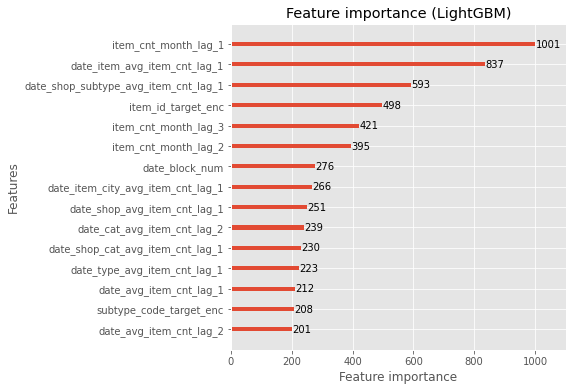

In [ ]:
print(np.sqrt(mean_squared_error(Y_valid, model_lgbm.predict(X_valid))))
lgb.plot_importance(model_lgbm, max_num_features=15, figsize=(6,6), title='Feature importance (LightGBM)')
plt.show()

## 4.5. XGBoost

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=500, subsample=0.8, eta=0.2, seed=RANDOM_STATE, reg_alpha=2.0, reg_lambda=2.0)

model_xgb.fit(X_train, Y_train, eval_metric='rmse', eval_set=[(X_valid, Y_valid)],
              verbose=True, early_stopping_rounds=10)
joblib.dump(model_xgb, 'models/model_xgb.pkl');

[17:53:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:42] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:1.12613
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.09387
[2]	validation_0-rmse:1.06956
[3]	validation_0-rmse:1.04783
[4]	validation_0-rmse:1.03076
[5]	validation_0-rmse:1.0164
[6]	validation_0-rmse:1.00185
[7]	validation_0-rmse:0.989799
[8]	validation_0-rmse:0.980846
[9]	validation_0-rmse:0.97259
[10]	validation_0-rmse:0.967591
[11]	validation_0-rmse:0.962073
[12]	validation_0-rmse:0.958227
[13]	validation_0-rmse:0.95395
[14]	validation_0-rmse:0.950772
[15]	validation_0-rmse:0.948737
[16]	validation_0-rmse:0.946903
[17]	validation_0-rmse:0.945299
[18]	validation_0-rmse:0.944909
[19]	v

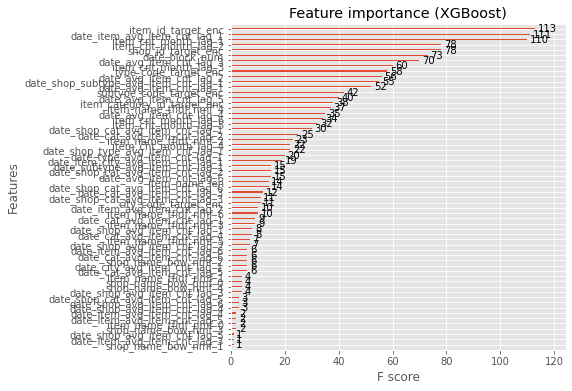

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
xgb.plot_importance(model_xgb, title='Feature importance (XGBoost)', ax=ax)
plt.show()

## 4.6. Ensembling: XGBoost + Linear Regression

**Ensembling metafeatures**

We will implement the KFold scheme Time Series implemented in the previous assignment:

1. *Split the train data into chunks of duration T. Select first M chunks.*
2. *Fit N diverse models on those M chunks and predict for the chunk M+1. Then fit those models on first M+1 chunks and predict for chunk M+2 and so on, until you hit the end. After that use all train data to fit models and get predictions for test. Now we will have meta-features for the chunks starting from number M+1 as well as meta-features for the test.*
3. *Now we can use meta-features from first K chunks [M+1,M+2,..,M+K] to fit level 2 models and validate them on chunk M+K+1. Essentially we are back to step 1. with the lesser amount of chunks and meta-features instead of features.*

We start with our **1st generation features**:

In [ ]:
model_xgb = joblib.load('models/model_xgb.pkl')
model_linreg = joblib.load('models/model_linreg.pkl')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_valid_std = scaler.transform(X_valid)

Y_valid_xgb = model_xgb.predict(X_valid)
Y_valid_lreg = model_linreg.predict(X_valid_std)
X_valid_level2 = np.c_[Y_valid_xgb, Y_valid_lreg]
X_valid_level2[:10,:]

[23:08:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([[ 0.07645258, -0.06685381],
       [ 0.10011038, -0.18120113],
       [ 0.17061061,  0.07159711],
       [ 0.24581656,  0.41151853],
       [ 0.04128212,  0.07260444],
       [ 0.00919223, -0.04376229],
       [-0.00424701, -0.07451723],
       [-0.00424701, -0.09707066],
       [-0.00424701, -0.09529483],
       [-0.00424701, -0.0798359 ]])

In [ ]:
X_train = all_data[all_data['date_block_num']<=32].drop(['item_cnt_month'], axis=1)
Y_train = all_data[all_data['date_block_num']<=32]['item_cnt_month']
X_valid = all_data[all_data['date_block_num']==33].drop(['item_cnt_month'], axis=1)
Y_valid = all_data[all_data['date_block_num']==33]['item_cnt_month']

dates = all_data['date_block_num']
last_block = dates.max()
print('Test `date_block_num` is %d' % last_block)
dates_train = dates[dates < last_block]
dates_test  = dates[dates == last_block]

periods = np.arange(26, 33, 1)
dates_train_level2 = dates_train[dates_train.isin(periods)]
Y_train_level2 = Y_train[dates_train.isin(periods)]
X_train_level2 = np.zeros([Y_train_level2.shape[0], 2])

Test `date_block_num` is 34


In [ ]:
for cur_block_num in periods:
    
    print('cur_block_num:', cur_block_num)
    
    # 1. Split `X_train` into parts
    x = all_data[all_data['date_block_num']<cur_block_num].drop(['item_cnt_month'], axis=1)
    y = all_data[all_data['date_block_num']<cur_block_num]['item_cnt_month'].values
    x_test =  all_data[all_data['date_block_num']==cur_block_num].drop(['item_cnt_month'], axis=1)
    y_test =  all_data[all_data['date_block_num']==cur_block_num]['item_cnt_month'].values
    
    # 2. Fit linear regression
    print('Linear regression')
    lr = LinearRegression(fit_intercept=True, normalize=True)
    scaler = StandardScaler().fit(x)
    x_std = scaler.transform(x)
    x_test_std = scaler.transform(x_test)
    lr.fit(x_std, y)
    Y_test_1 = lr.predict(x_test_std)
    
    # 3. Fit xgb and put predictions
    print('XGB')
    model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=500, subsample=0.8, eta=0.2, seed=RANDOM_STATE, reg_alpha=2.0, reg_lambda=2.0)
    model_xgb.fit(x, y, eval_metric='rmse', verbose=True, early_stopping_rounds=10)
    Y_test_2 = model_xgb.predict(x_test)
    
    # 4. Store predictions from 2. and 3. in the right place of `X_train_level2`
    X_train_level2[dates_train_level2 == cur_block_num] = np.c_[Y_test_1, Y_test_2]
    clear_output()

print(X_train_level2.mean(axis=0))

cur_block_num: 26
Linear regression


In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X_train_level2[:,0], X_train_level2[:,1], marker='o', alpha=0.15)
plt.xlabel('Linear regression test set predictions')
plt.ylabel('LightGBM test set predictions')
plt.show()

In [ ]:
y_train_level2 = Y_train[dates_train.isin(periods)]
lr_stack = LinearRegression().fit(X_train_level2, y_train_level2)
train_preds = lr_stack.predict(X_train_level2)
rmse_train = np.sqrt(mean_squared_error(y_train_level2, train_preds))

valid_preds = lr_stack.predict(X_valid_level2)
rmse_valid = np.sqrt(mean_squared_error(Y_valid, valid_preds))

print('RMSE Train: %f' % rmse_train)
print('RMSE Test : %f' % rmse_valid)

## 4.7. Leaderboard test predictions

In [ ]:
# model_linreg = joblib.load('models/model_linreg.pkl')
# model_xgb = joblib.load('models/model_xgb.pkl')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_test_std = scaler.transform(X_test)
Y_test_lreg = model_linreg.predict(X_test_std).clip(0, 20)
Y_test_xgbm =  model_xgb.predict(X_test).clip(0, 20)
Y_test_lgbm = model_lgbm.predict(X_test).clip(0, 20)

len(Y_test_lreg)

In [ ]:
models = [Y_test_lreg,Y_test_xgbm,Y_test_lgbm]


names = ['LINREG','XGBM','LGBM']

# submissions_path='submissions'
submissions_path='/content/submissions'
if not os.path.exists(submissions_path):
    os.makedirs(submissions_path)
for model, name in zip(models, names):
    temp = pd.DataFrame({'ID': test.ID, 'item_cnt_month': model})
    temp.to_csv(submissions_path+'/submmission_'+str(name)+'.csv', index=False)